# Principal Component Analysis

## import library

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [133]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

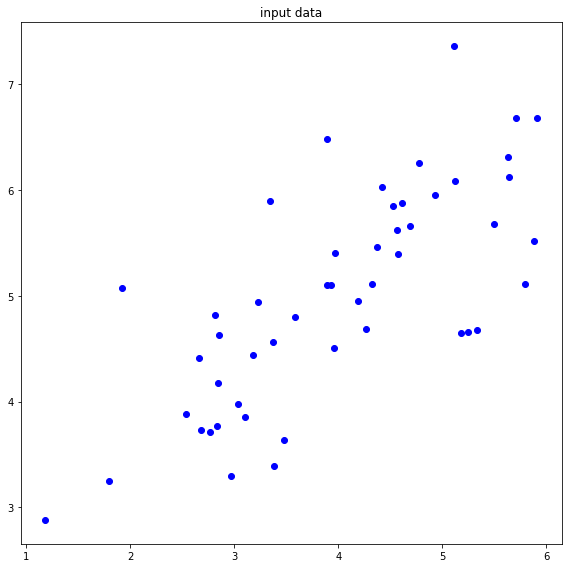

In [134]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

In [232]:
def z_scoring(x, y):

    # center the data
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # varaiance normalizaion
    std_x = np.std(x)
    std_y = np.std(y)

    z_x = np.subtract(x, mean_x) / std_x
    z_y = np.subtract(y, mean_y) / std_y
    
    return z_x, z_y

In [249]:
def plot_data_nomalization(z_x, z_y):

    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    
    plt.scatter(z_x, z_y, color='blue')
        
    plt.tight_layout()
    plt.show()

## compute covariance matrix

In [234]:
def compute_covariance(feature):
    
    Sigma = np.matmul(feature.T, feature) / number_data
    
    return Sigma

## compute principal directions

In [235]:
def compute_eigen(X):
    
    Sigma = compute_covariance(X)
    S, U = np.linalg.eig(Sigma)
    
    return S, U

In [236]:
def plot_principal_directions(P, origin):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    plt.quiver(*origin, P[0, :], P[1, :], color=['r','g'])
    plt.scatter(z_x, z_y, color='blue')

    plt.tight_layout()
    plt.show()

In [237]:
def compute_principal_directions(S, U):
    
    P = S * U
    
    return P

## first principal axis

In [255]:
def plot_frist_principal_axis(origin, U, z_x, z_y):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    plt.axline(origin[0], U, color='red')
    plt.scatter(z_x, z_y, color='blue')

    plt.tight_layout()
    plt.show()

## second principal axis

In [256]:
def plot_second_principal_axis(origin, U, z_x, z_y):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    plt.axline(origin[0], U, color='red')
    plt.scatter(z_x, z_y, color='blue')

    plt.tight_layout()
    plt.show()

## compute the projection of point onto the line

In [240]:
def compute_projection_onto_line(feature, vector):
    
    projection = (np.dot(feature,vector)/np.linalg.norm(vector)**2) * vector
    
    return projection

## projcet to the first principal axis

In [263]:
def plot_proj_first_pa(X, origin, U, z_x, z_y):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    plt.axline(origin[0], U, color='red')

    for i in range(number_data):
        projection = compute_projection_onto_line(X[i], U)
        plt.scatter(projection[0], projection[1], color='green')
    plt.scatter(z_x, z_y, color='blue')

    plt.tight_layout()
    plt.show()

## projcet to the second principal axis

In [264]:
def plot_proj_second_pa(X, origin, U, z_x, z_y):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    plt.axline(origin[0], U, color='red')

    for i in range(number_data):
        projection = compute_projection_onto_line(X[i], U)
        plt.scatter(projection[0], projection[1], color='green')
    plt.scatter(z_x, z_y, color='blue')


    plt.tight_layout()
    plt.show()

## connect original data to the projection onto the first principal axis

In [268]:
def plot_proj_line_first_pa(X, origin, U, z_x, z_y):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    plt.axline(origin[0], U, color='red')

    for i in range(number_data):
        projection = compute_projection_onto_line(X[i], U)
        plt.scatter(projection[0], projection[1], color='green')
        plt.plot([X[i][0] ,projection[0]], [X[i][1] ,projection[1]], color='gray')
    plt.scatter(z_x, z_y, color='blue')

    plt.tight_layout()
    plt.show()

## connect original data to the projection onto the second principal axis

In [272]:
def plot_proj_line_second_pa(X, origin, U, z_x, z_y):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    plt.axline(origin[0], U, color='red')

    for i in range(number_data):
        projection = compute_projection_onto_line(X[i], U)
        plt.scatter(projection[0], projection[1], color='green')
        plt.plot([X[i][0] ,projection[0]], [X[i][1] ,projection[1]], color='gray')
    plt.scatter(z_x, z_y, color='blue')

    plt.tight_layout()
    plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

In [245]:
z_x, z_y = z_scoring(x, y)
X = np.column_stack((z_x, z_y))
S, U = compute_eigen(X)

origin = np.array([[0, 0],[0, 0]]) # data mean이 0

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

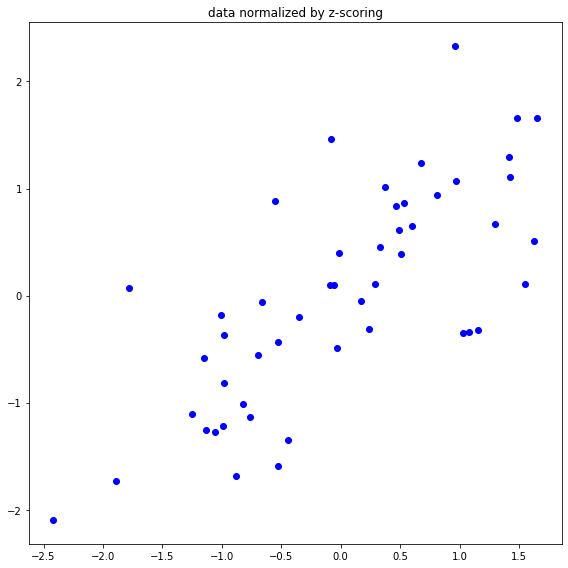

In [251]:
plot_data_nomalization(z_x, z_y)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

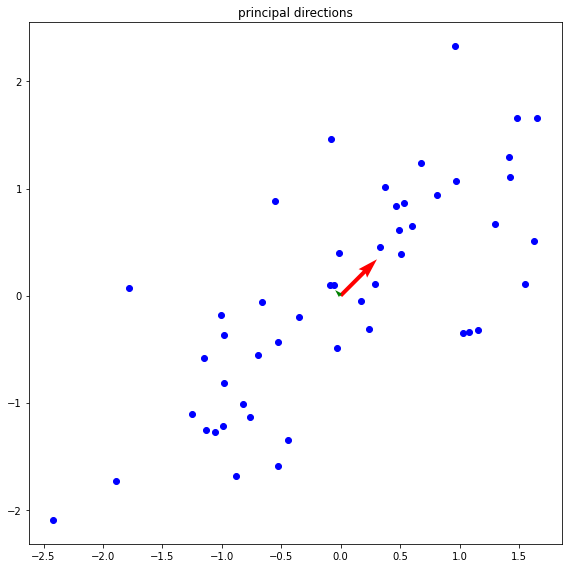

In [252]:
plot_principal_directions(P, origin)

***

### 3. plot the first principal axis in red on the normalized data in blue

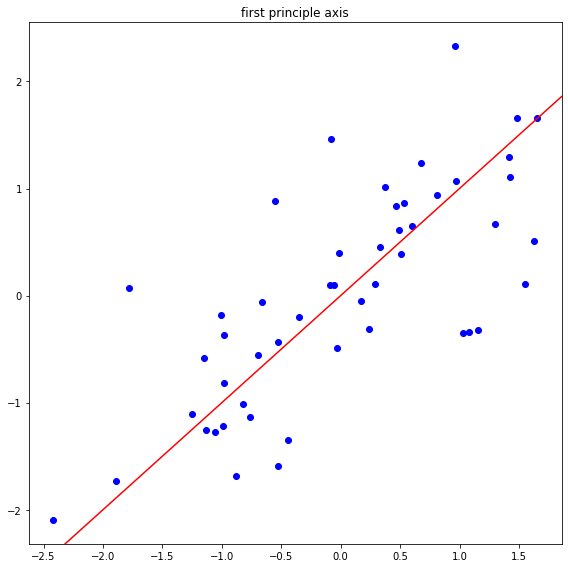

In [258]:
plot_frist_principal_axis(origin, U[:, 0], z_x, z_y)

***

### 4. plot the second principal axis in red on the normalized data in blue

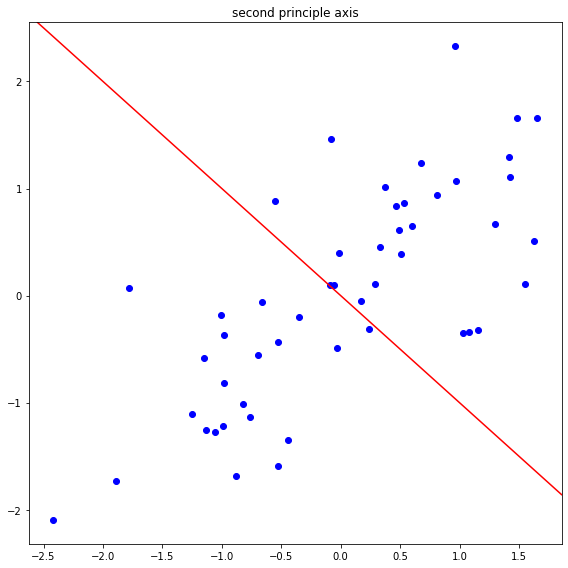

In [257]:
plot_second_principal_axis(origin, U[:, 1], z_x, z_y)

***

### 5. plot the projection of data in green onto the first principal axis in red

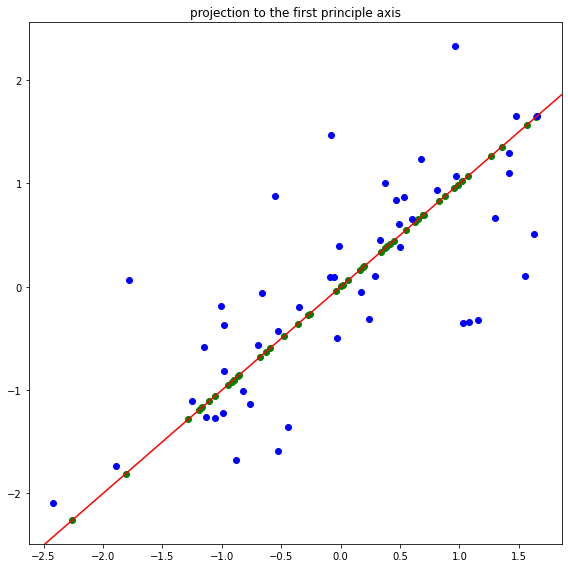

In [265]:
plot_proj_first_pa(X, origin, U[:, 0], z_x, z_y)

***

### 6. plot the projection of data in green onto the second principal axis in red

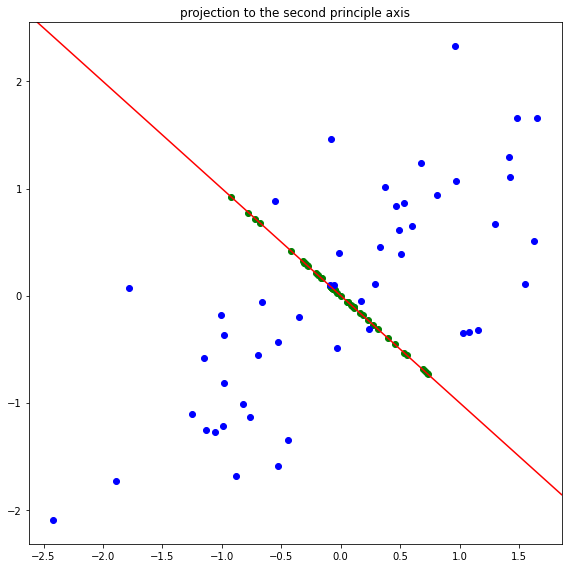

In [266]:
plot_proj_second_pa(X, origin, U[:,1], z_x, z_y)

***

### 7. plot the projection line in grey onto the first principal axis

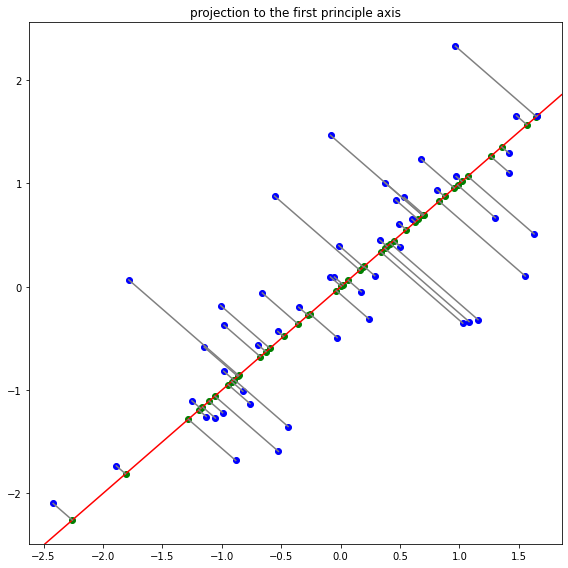

In [270]:
plot_proj_line_first_pa(X, origin, U[:, 0], z_x, z_y)

***

### 8. plot the projection line in grey onto the second principal axis

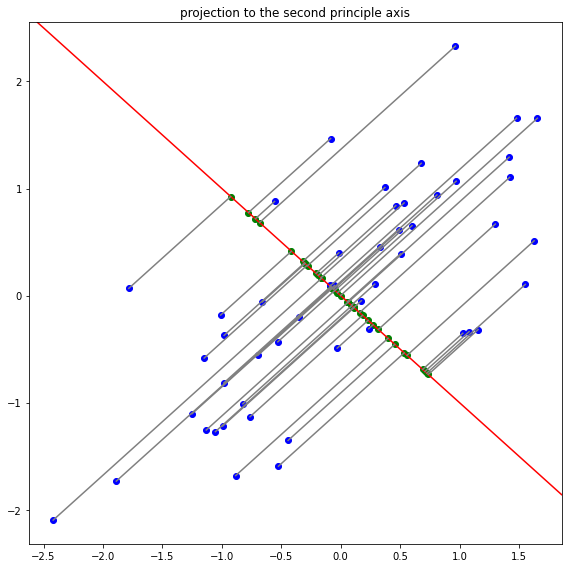

In [273]:
plot_proj_line_second_pa(X, origin, U[:, 1], z_x, z_y)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***